# Customer habits of [Ford GoBike System](https://s3.amazonaws.com/fordgobike-data/index.html) in 2019

<span style="color: gray; font-size:1em;">Vipin K</span>
<br><span style="color: gray; font-size:1em;">August-2020</span>

## Investigation Overview

In this investigation, I wanted to look at the characteristics of trip data . The main focus was on the age and its relation between other attributes.


## Dataset Overview

The data consisted of duration_sec and attributes of approximately 239,111 data. The dataset included the 5-6 important columns as well as additional measurements such as start station name, start station latitude, and start station longitude. 

In [19]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [20]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('clean_ford_data.csv')

## The bike sharing system is mainly used by age group 20-40.

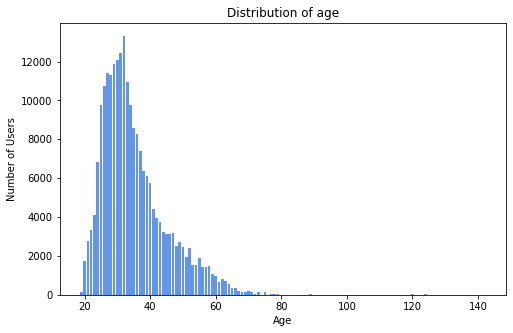

In [21]:
# plotting types of users 
plt.figure(figsize=[8,5])
plt.bar(x = df_clean.age.value_counts().keys(), height = df_clean.age.value_counts(),color='cornflowerblue' )
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

## Most of the people uses station id less than 100

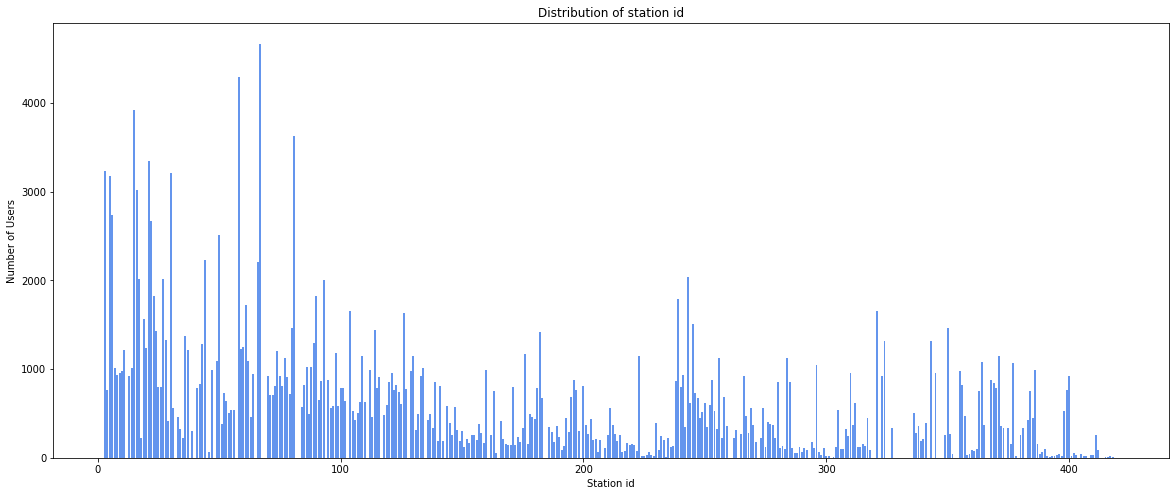

In [22]:
# plotting start stations 
plt.figure(figsize=[20,8])
plt.bar(x = df_clean.start_station_id.value_counts().keys(), height = df_clean.start_station_id.value_counts(),color='cornflowerblue' )
plt.title('Distribution of station id')
plt.xlabel('Station id')
plt.ylabel('Number of Users')
plt.show()

## Age v/s Gender Garaph 


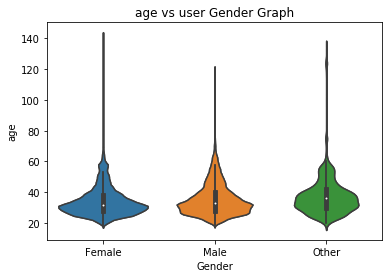

In [23]:

# Representing data using violin form

fig=sns.violinplot(x = 'member_gender', y = 'age', data = df_clean)
sns.violinplot(x='member_gender', y='age', data=df_clean)
plt.xlabel("Gender")
plt.ylabel("age")
plt.title("age vs user Gender Graph") 
plt.show(fig)

## Trip Duration by subscription type

> There is a difference in the trip duration between customers and subscribers. **Subscriber** trips are usually shorter than for customers.

(0, 149.57214669927498)

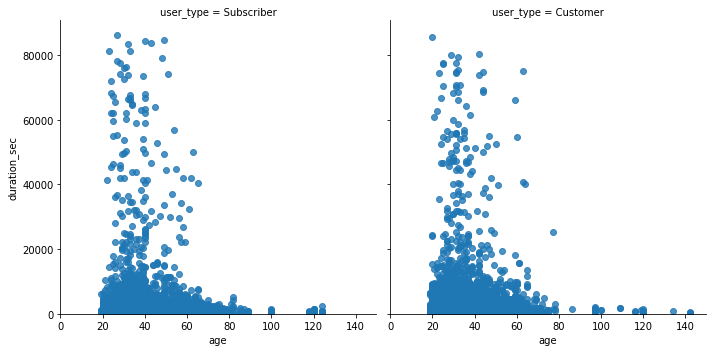

In [24]:
# Plot using duration vs age graph using seaborn
sns.lmplot(x='age', y='duration_sec', data=df_clean,
           fit_reg=False, 
           col='user_type')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

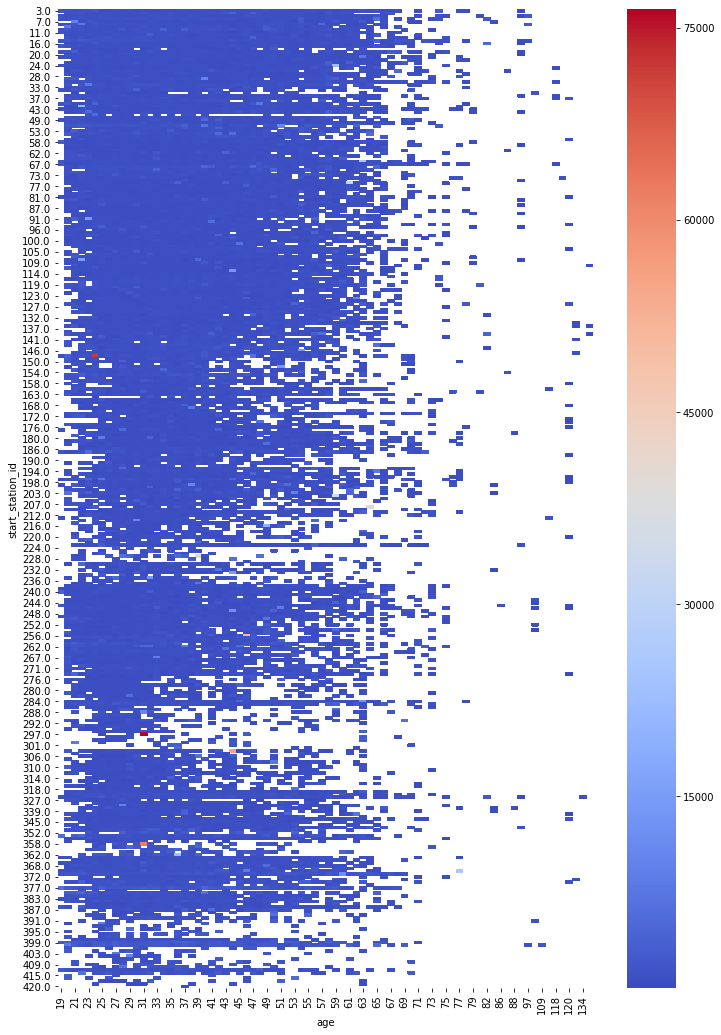

In [25]:
df3 = df_clean[['start_station_id','age', 'duration_sec']]
# pandas pivot with multiple variables
heatmap3_data = pd.pivot_table(df3,values='duration_sec', index=['start_station_id'], columns='age')
plt.figure(figsize=(12, 18))
sns.heatmap(heatmap3_data, cmap="coolwarm",fmt=".1f")

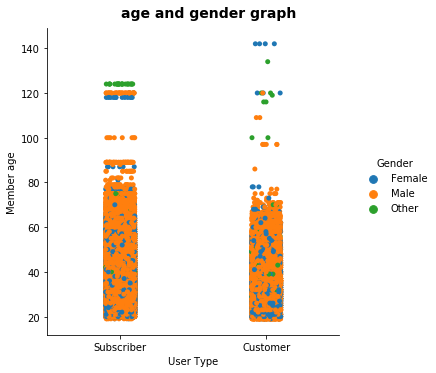

In [26]:
g = sns.catplot(data=df_clean, x='user_type', y="age", hue="member_gender")

g.set_axis_labels("User Type", "Member age")
g._legend.set_title('Gender')
g.fig.suptitle('age and gender graph', y=1.03, fontsize=14, fontweight='semibold');

## Summary

> Here we found that more aged users are fall under the subscriber category and subscribers are using this service almost for short trips. Most of the users renting bikes from station id less than 100 and the surprsing factor is more teenegers use a particular station id around 250.From the age vs gender graph we found that some users with 100 years of age are using this services and they fall under the subscriber category. To conclude we can see that most of the users are under the age 20-40.